In [1]:
import json
import numpy as np
import torch
import torch.nn as nn
from utilities.config import Config
from environment.unity import UnityEnv
from network.bodies import Actor, FCBody, Critic
from network.ddpg import DDPGNetwork
from agent.ddpg import DDPGAgent

file_name = 'config.json'

with open(file_name) as f:
    args = json.load(f)
    config = Config()
    config.merge(args)
    config.env = UnityEnv(config.env_name, config.train_mode)
    

Device cuda
Loading reacher in Train Mode True


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
config.actor_net_func = lambda: Actor(
    FCBody(config.env.state_dim, gate_func=nn.ReLU), 
    config.env.action_dim,
    nn.Tanh)

config.critic_net_func = lambda: Critic(
    config.env.state_dim,
    config.env.action_dim)

config.actor_opt_func = lambda params: \
    torch.optim.Adam(params, config.actor_learning_rate)
config.critic_opt_func = lambda params: \
    torch.optim.Adam(params, config.critic_learning_rate, weight_decay=config.weight_decay)
config.network_func = lambda: DDPGNetwork(config)


In [3]:
agent = DDPGAgent(config)

In [4]:
from collections import deque

def ddpg(config, n_episodes=1000, max_t=1000, print_every=100):
  
    scores_deque = deque(maxlen=config.log_interval)
    scores = []
    for i_episode in range(1, config.num_episodes+1):
        agent.reset()
        episide_score = 0
        for t in range(config.max_steps):
            score, done = agent.step()
            episide_score += score
            if done:
                break 
        scores_deque.append(episide_score)
        scores.append(episide_score)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        torch.save(agent.network.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.network.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            
    return scores

scores = ddpg(config)

Episode 100	Average Score: 1.52
Episode 200	Average Score: 2.38
Episode 300	Average Score: 4.22
Episode 400	Average Score: 7.01
Episode 500	Average Score: 9.10
Episode 600	Average Score: 15.85
Episode 700	Average Score: 24.73
Episode 800	Average Score: 29.90
Episode 900	Average Score: 35.53
Episode 1000	Average Score: 36.69


In [5]:
torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')

In [6]:
torch.save(scores, 'training_scores.score')

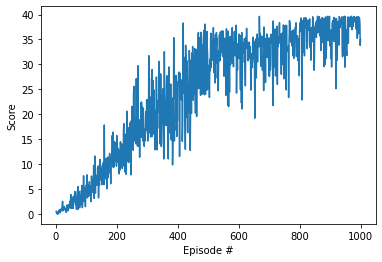

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
torch.save()